In [1]:
import pandas as pd
import numpy as np
import os
import glob
from config import load_config
paths = load_config(dataset_key='all')
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import h5py
import json

Paths are for dataset tagged: all


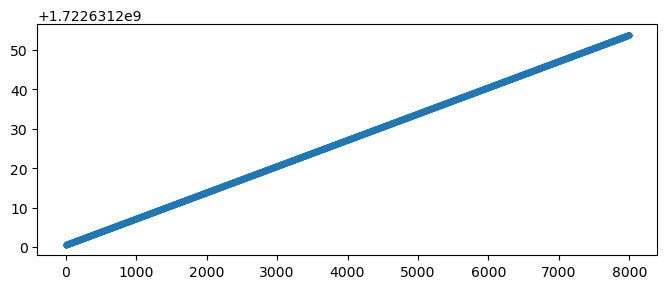

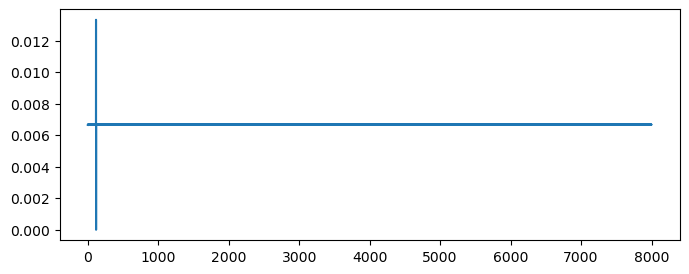

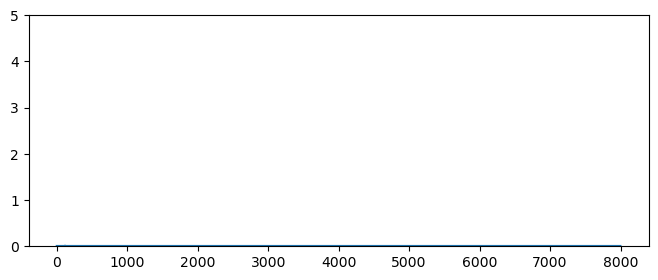

In [2]:
# Load HSFP preprocessed hdf5 file 
f = h5py.File(paths['raw_data'] / 'hsfp_data_preprocessed_noisereg.hdf5','r')
time_405 = np.array(f['Time_405'])
time_445 = np.array(f['Time_445'])
time_473 = np.array(f['Time_473'])
time_514 = np.array(f['Time_514'])
time_560 = np.array(f['Time_560'])
timestamps = np.array(f['Full_TimeStamps'])
lasers = np.array(f['Lasers'])
wavelength = np.array(f['Wavelength'])
L_405_F1 = np.array(f['Channel_405_F1'])
L_405_F2 = np.array(f['Channel_405_F2'])
L_445_F1 = np.array(f['Channel_445_F1'])
L_445_F2 = np.array(f['Channel_445_F2'])
L_473_F1 = np.array(f['Channel_473_F1'])
L_473_F2 = np.array(f['Channel_473_F2'])
L_514_F1 = np.array(f['Channel_514_F1'])
L_514_F2 = np.array(f['Channel_514_F2'])
L_560_F1 = np.array(f['Channel_560_F1'])
L_560_F2 = np.array(f['Channel_560_F2'])
# Plot figure with camTrigger 
plt.figure(figsize=(8,3))
plt.plot(timestamps,'.')
plt.show()
plt.figure(figsize=(8,3))
plt.plot(np.diff(timestamps))
plt.show()
plt.figure(figsize=(8,3))
plt.plot(np.diff(timestamps))
plt.ylim(0,5)
plt.show()

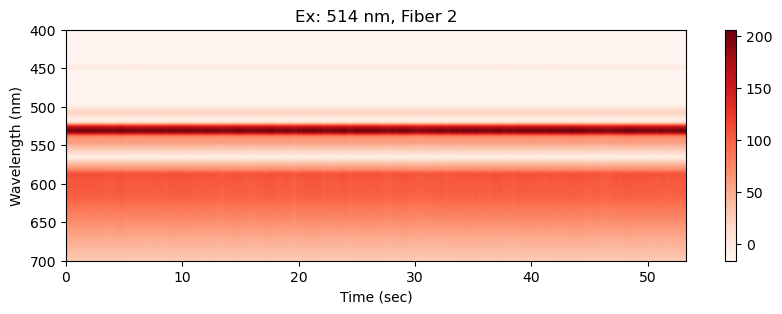

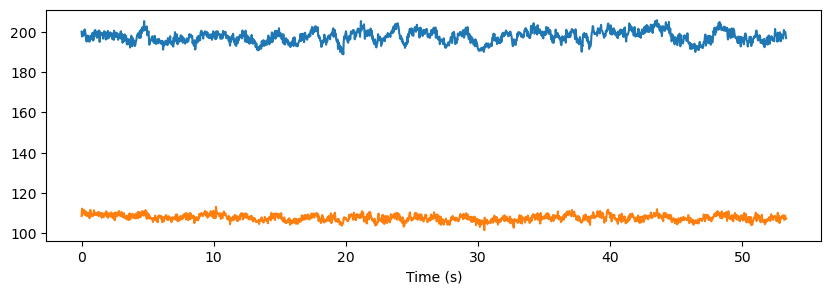

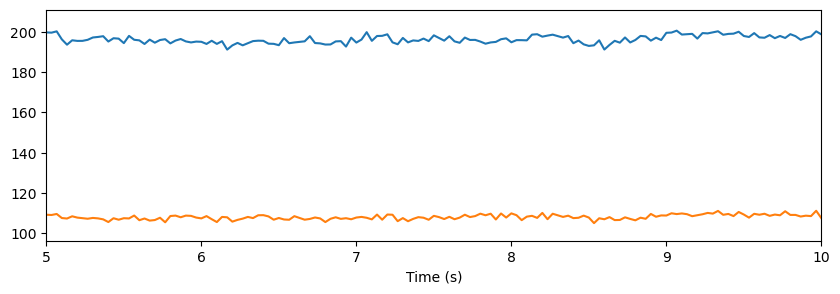

In [4]:
# Plot spectrogram of wavelength over time

data = L_514_F2
t = time_514-time_514[0]

plt.figure(figsize=(10,3))
plt.imshow(np.transpose(data),aspect='auto',cmap='Reds',extent=[t[0],t[-1],700,400])
plt.colorbar()
plt.xlabel('Time (sec)')
plt.ylabel('Wavelength (nm)')
plt.title('Ex: 514 nm, Fiber 2')

px_1 = 530
px_2 = 590

plt.figure(figsize=(10,3))
plt.plot(t,data[:,px_1-400])
plt.plot(t,data[:,px_2-400])
plt.xlabel('Time (s)')
plt.show()

plt.figure(figsize=(10,3))
plt.plot(t,data[:,px_1-400])
plt.plot(t,data[:,px_2-400])
plt.xlim(5,10)
plt.xlabel('Time (s)')
plt.show()

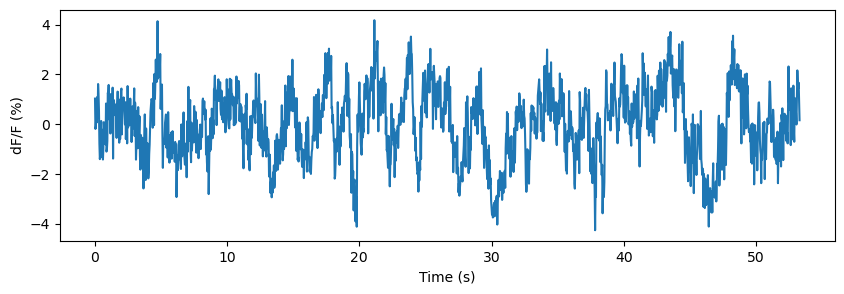

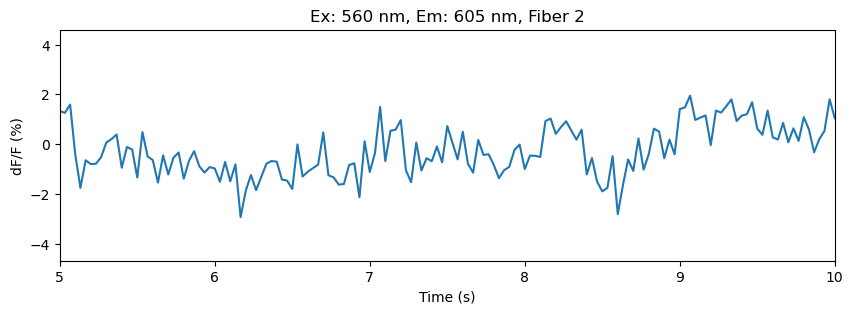

In [7]:
# Plot check for harp triggers and 560 nm signal in time

# Detrent the signal with a 4th order polynomial
def detrend_signal(signal):
    x = np.arange(len(signal))
    p = np.polyfit(x,signal,4)
    y = np.polyval(p,x)
    signal_detrended = signal - y + np.mean(signal)
    return signal_detrended

data = L_514_F2
px = 530
detrended_signal = detrend_signal(data[:,px-400])

# Calculate deltaF/F for 560 nm signal
dF_F = 100*(detrended_signal-np.mean(detrended_signal))/np.mean(detrended_signal)

plt.figure(figsize=(10,3))
plt.plot(time_514-time_514[0],dF_F)
plt.xlabel('Time (s)')
plt.ylabel('dF/F (%)')
plt.show()

plt.figure(figsize=(10,3))
plt.plot(time_514-time_514[0],dF_F)
plt.xlim(5,10)
plt.xlabel('Time (s)')
plt.ylabel('dF/F (%)')
plt.title('Ex: 560 nm, Em: 605 nm, Fiber 2')
plt.show()
